<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [145]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [146]:
past = pd.read_csv('../dat/past.csv.gz')

In [147]:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [148]:
past

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000000,15.840000,15.840000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0,0.000000,1.000000
1,5647110,5.326529e+08,2.250000,1.500000,27556.500000,5.800000,5.565000,1.250000,0.250000,0.250000,...,0.250000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0,0.000000,1.000000
2,5790472,4.578109e+08,1.000000,1.000000,0.000000,6.272500,6.272500,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0,0.000000,1.000000
3,5811598,4.612641e+08,1.500000,1.500000,131532.500000,5.560000,5.560000,0.250000,1.000000,0.250000,...,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0,0.250000,1.000000
4,5846363,5.157993e+08,1.875000,1.375000,11055.875000,4.086250,4.086250,0.500000,1.000000,0.250000,...,0.250000,0.375000,0.000000,0.125000,0.250000,0.250000,0.000000,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000


In [150]:
print(past['Purchased?'].value_counts(normalize=True)[1]*100,'%',' of pruduct-user-interactions resulted in a purchase')

34.38 %  of pruduct-user-interactions resulted in a purchase


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [151]:
X = past.drop(columns=['product_id', 'user_id', 'Purchased?'])
y = past.pop('Purchased?')

In [152]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [153]:
scaler = StandardScaler()

In [154]:
X_scaled = scaler.fit_transform(X)

In [155]:
pca = PCA(n_components=5, whiten=True)
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)

In [156]:
X_reduced

array([[ 0.30686907, -0.95333295,  0.75599746, -0.05738579,  0.53898711],
       [ 0.24562108,  0.00349238, -0.42739243,  0.2362305 ,  0.56100024],
       [-0.08747692, -0.65379057, -0.33520918, -0.20612187, -1.19360092],
       ...,
       [ 1.15577718, -1.33864378, -0.68888121, -0.51890786,  1.11390353],
       [ 1.34153172, -1.10925248, -0.74701415,  0.48095407,  1.71975049],
       [-1.32058528,  0.19755978,  0.03749548, -0.24310336,  0.30338689]])

In [157]:
pca.mean_

array([ 1.42108547e-18,  5.11590770e-17, -2.84217094e-18, -2.91322522e-17,
       -4.26325641e-18,  6.67910172e-17, -9.16600129e-17,  6.75015599e-17,
       -8.52651283e-18,  1.98951966e-17, -1.27897692e-17,  0.00000000e+00,
        1.98951966e-17,  2.98427949e-17, -2.13162821e-17,  5.68434189e-18,
        9.02389274e-17, -9.91207116e-17,  6.82121026e-17,  6.53699317e-17,
        1.02318154e-16, -2.27373675e-17,  9.37916411e-17, -1.42108547e-18,
        4.83169060e-17,  2.27373675e-17,  1.33582034e-16, -7.81597009e-18,
       -1.08002496e-16,  5.82645043e-17,  7.24753590e-17, -3.44613227e-17,
        2.70006240e-17,  2.33058017e-16])

In [158]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [159]:
pca.explained_variance_ratio_

array([0.10282348, 0.09445174, 0.0651327 , 0.05105275, 0.04286963])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [160]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [161]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

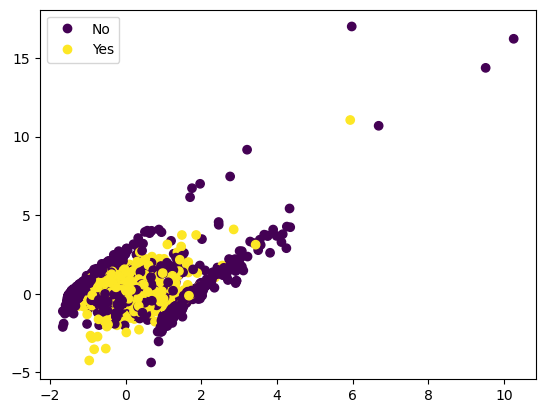

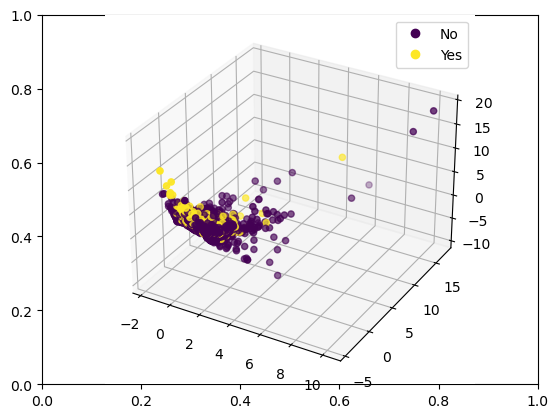

In [162]:
visualize_2pcs(X_reduced, y)
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

def train(X, y, standardize = True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    if standardize:
        print('standardizing\n')
        clf = make_pipeline(StandardScaler(), LogisticRegression())
    else:
        print('not standardizing\n')
        clf = make_pipeline(LogisticRegression())

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(clf,'\n')
    print(classification_report(y_test, y_pred, labels=[0, 1]))
    print(confusion_matrix(y_test, y_pred))

Now apply the pipeline on the all the features `X` and review the performance

In [164]:
train(X, y, True)

standardizing

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())]) 

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       649
           1       0.45      0.11      0.17       351

    accuracy                           0.64      1000
   macro avg       0.55      0.52      0.47      1000
weighted avg       0.58      0.64      0.56      1000

[[602  47]
 [313  38]]


In [165]:
train(X, y, False)

not standardizing

Pipeline(steps=[('logisticregression', LogisticRegression())]) 

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       649
           1       0.11      0.00      0.01       351

    accuracy                           0.64      1000
   macro avg       0.38      0.50      0.39      1000
weighted avg       0.46      0.64      0.51      1000

[[641   8]
 [350   1]]


In [12]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [166]:
# we should not standardize here because standardization should happen *before* PCA,
# which we already did when constructing X_reduced
train(X_reduced, y, False)

not standardizing

Pipeline(steps=[('logisticregression', LogisticRegression())]) 

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       649
           1       0.04      0.00      0.01       351

    accuracy                           0.63      1000
   macro avg       0.34      0.48      0.39      1000
weighted avg       0.43      0.63      0.50      1000

[[625  24]
 [350   1]]


In [13]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       649
           1       0.49      0.54      0.51       351

    accuracy                           0.64      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.65      0.64      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

The model is quite bad. The model with PCA does not perform well. I suspect, because of the very small amount of data and because the 5 component only contained about 35% of the explained variance.

Not sure why the results are so different from the ones shown in the unexecuted notebook. I kept the results in here to compare it.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [100]:
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [167]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

In [168]:
ks = [i for i in range(2,10)]

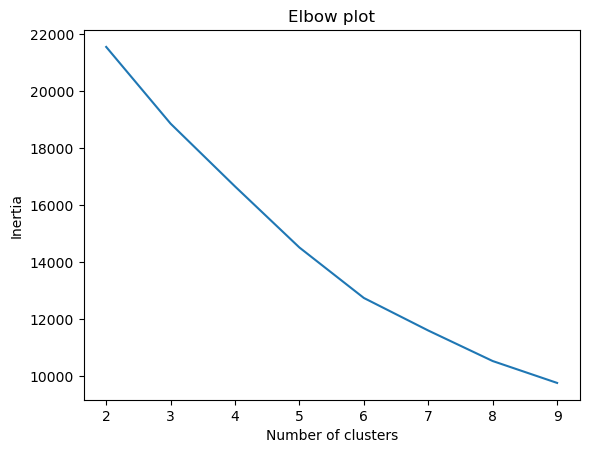

In [169]:
visualize_elbow(X_reduced, ks)

4. What are the disadvantage to use the Elbow method? 

The exact point of the elbow is often not clearly seen.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [170]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.1975288930010333
For n_clusters = 3 The average silhouette_score is : 0.20683347227627855
For n_clusters = 4 The average silhouette_score is : 0.21720753448821228
For n_clusters = 5 The average silhouette_score is : 0.20233283197722737
For n_clusters = 6 The average silhouette_score is : 0.21109581491741156
For n_clusters = 7 The average silhouette_score is : 0.21125986242877398
For n_clusters = 8 The average silhouette_score is : 0.21529992614609791


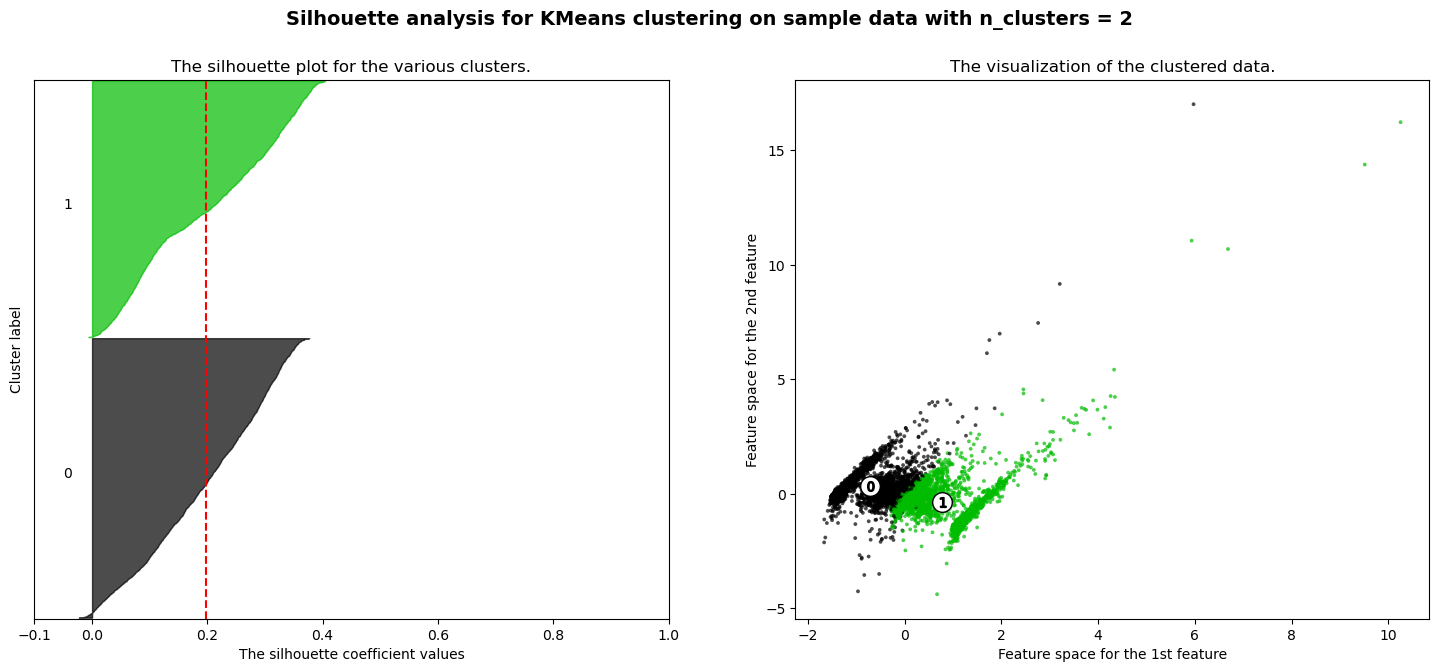

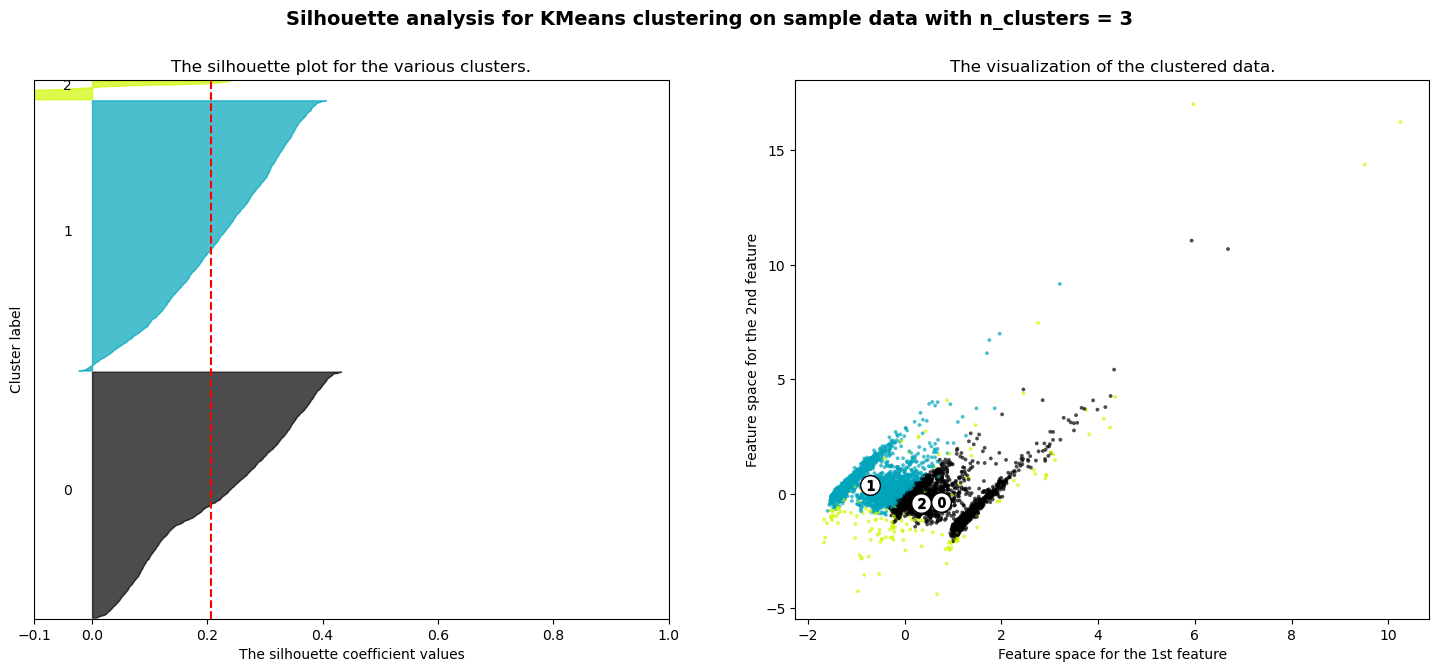

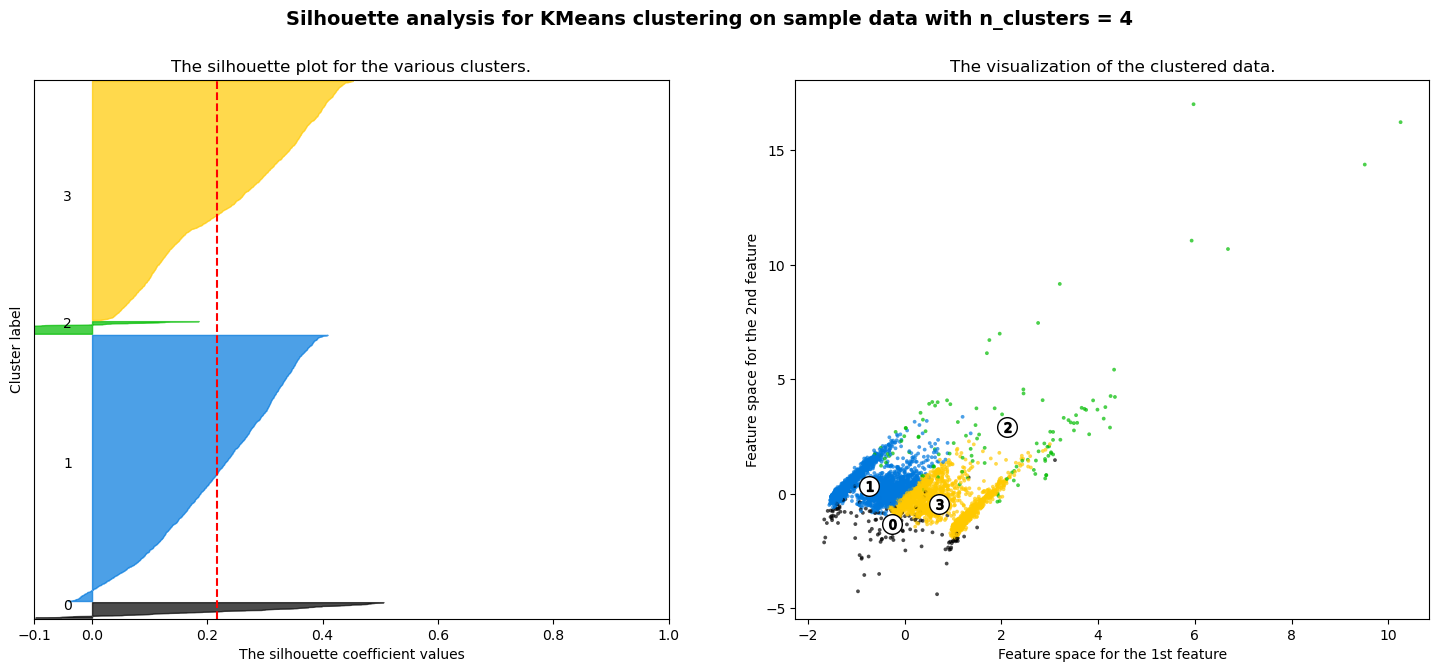

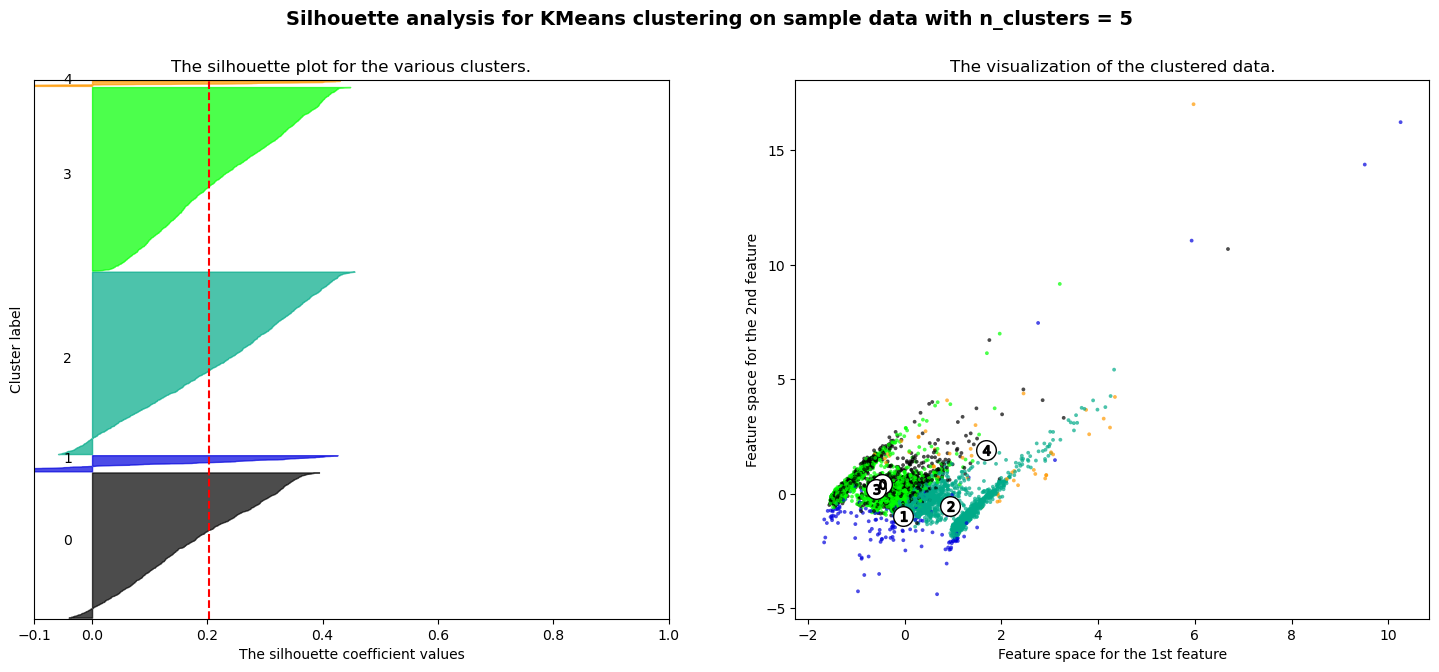

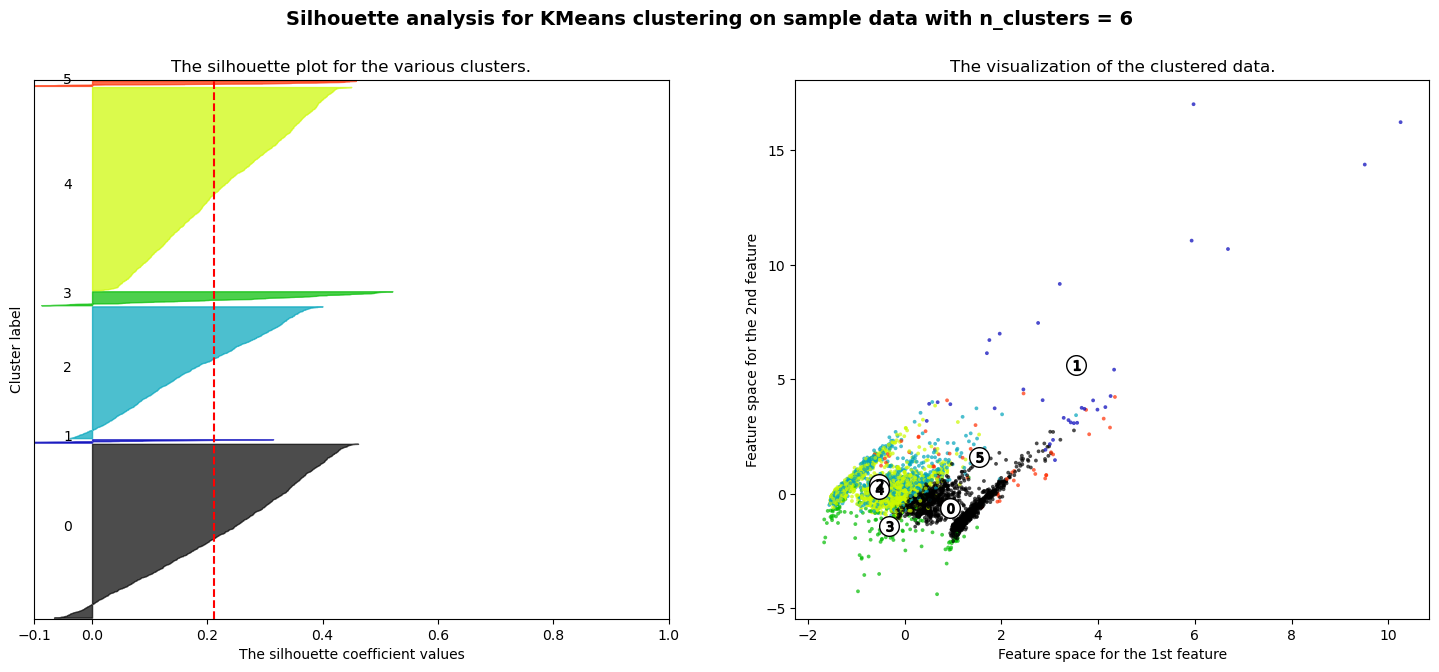

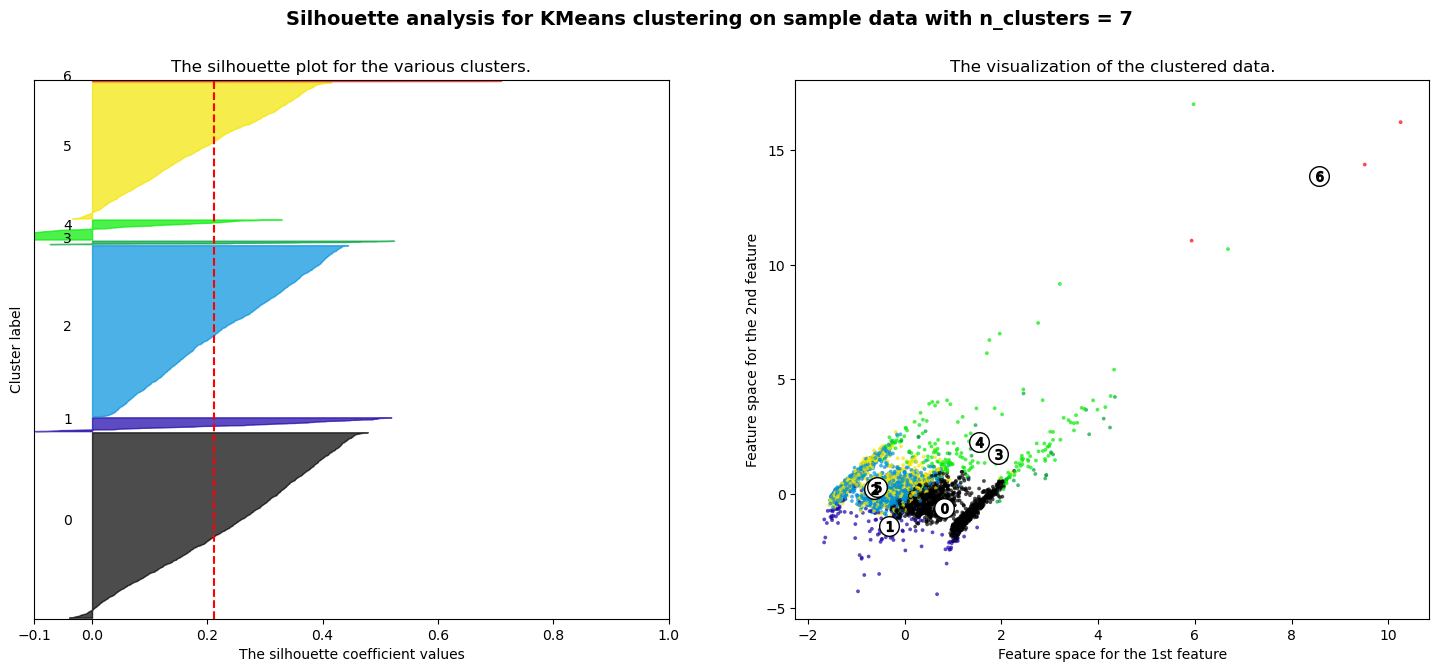

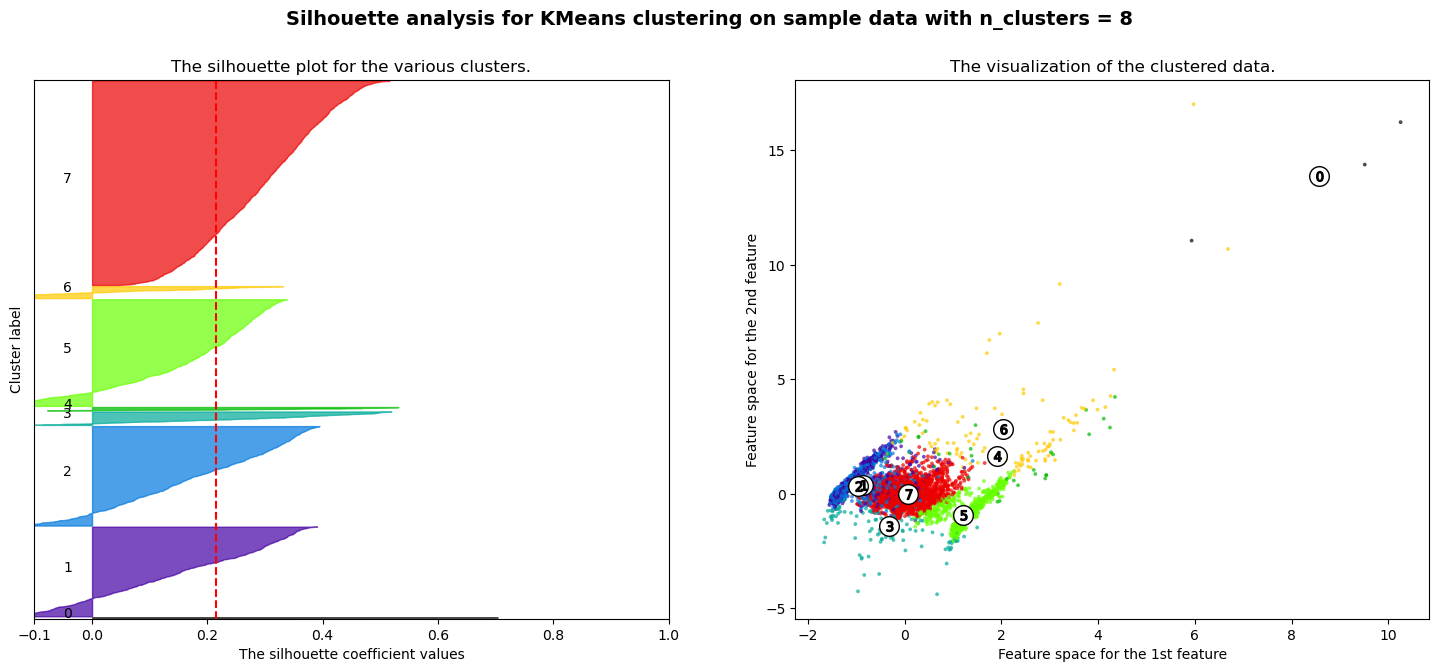

In [172]:
visualize_silhouette(8,X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [192]:
km = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X_reduced)

7. What is the size of each cluster? 

In [217]:
import numpy as np
unique, counts = np.unique(cluster_labels, return_counts=True)
print(unique)
print(counts)
print('\nCluster 0 has size',counts[0],'\nCluster 1 has size ',counts[1],
      '\nCluster 2 has size',counts[2],'\nCluster 3 has size ',counts[3])

[0 1 2 3]
[ 146 2494  119 2241]

Cluster 0 has size 146 
Cluster 1 has size  2494 
Cluster 2 has size 119 
Cluster 3 has size  2241


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [197]:
past['cluster_pca'] = cluster_labels

In [198]:
past

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000000,15.840000,15.840000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,1.000000,3
1,5647110,5.326529e+08,2.250000,1.500000,27556.500000,5.800000,5.565000,1.250000,0.250000,0.250000,...,0.250000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,3
2,5790472,4.578109e+08,1.000000,1.000000,0.000000,6.272500,6.272500,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,1.000000,3
3,5811598,4.612641e+08,1.500000,1.500000,131532.500000,5.560000,5.560000,0.250000,1.000000,0.250000,...,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0.250000,1.000000,3
4,5846363,5.157993e+08,1.875000,1.375000,11055.875000,4.086250,4.086250,0.500000,1.000000,0.250000,...,0.250000,0.375000,0.000000,0.125000,0.250000,0.250000,0.000000,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,3
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,0.090909,1.045455,1
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

Max Price and Min Price are very interesting and revela that Cluster 0 seems to only shop for very expensize items. We could advertize expensive premium items to them.

CLuster 2 has by far the largest mean values for InsessionCart, InsessionView, and InsessionRemove. This seems to be a group that is using and viewing the cart a lot. We could try to nudge them to buy the items in the cart by creating a sense of urgency by pretending that some of the items might be sold out soon.

In [215]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [214]:
past.groupby('cluster_pca').describe()

product_id                                                                                   user_id                                                                                                 NumOfEventsInJourney                                                         NumSessions                                                              interactionTime                                                                                    maxPrice                                                                    minPrice                                                                    NumCart                                                         NumView                                                         NumRemove                                                              InsessionCart                                                              InsessionView                                                                InsessionRemove              \
                 count          mean           std      min         25%        50%        75%        max   count          mean           std          min           25%           50%           75%          max                count      mean       std  min  25%       50%       75%   max       count      mean       std  min       25%       50%       75%   max           count          mean           std  min       25%           50%           75%         max    count       mean        std    min        25%     50%        75%     max    count       mean        std    min        25%     50%        75%     max   count      mean       std  min  25%  50%       75%        max   count      mean       std  min  25%       50%       75%   max     count      mean       std  min       25%       50%       75%   max         count        mean         std  min   25%   50%         75%     max         count       mean         std  min  25%   50%        75%          max           count        mean   
cluster_pca                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0                146.0  5.480166e+06  1.405361e+06   5379.0  5776717.75  5862357.5  5890638.0  5931773.0   146.0  5.351488e+08  5.419734e+07  143995345.0  5.178115e+08  5.464178e+08  5.658671e+08  615128468.0                146.0  1.478656  0.676720  1.0  1.0  1.316667  1.723913   6.2       146.0  1.195948  0.361129  1.0  1.000000  1.066667  1.290179   4.0           146.0  1.398702e+05  5.205882e+05  0.0      0.00  5.815000e+02  1.529456e+05   5874596.0    146.0  59.203191  33.245700  29.35  38.890000  47.135  63.361780  236.51    146.0  59.155365  33.237002  29.35  38.890000  46.580  63.313686  236.51   146.0  0.124484  0.224548  0.0  0.0  0.0  0.198077   1.500000   146.0  1.241033  0.470526  0.0  1.0  1.118056  1.346743   4.4     146.0  0.078030  0.197017  0.0  0.000000  0.000000  0.041229   1.0         146.0    3.029559    5.227885  0.0   0.0   1.0    3.458333    35.0         146.0   6.162547    8.307710  1.0  2.0   4.0   7.000000    55.795918           146.0    2.492213   
1               2494.0  5.544159e+06  1.2049

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

According to the sklearn website, "[i]nertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes."

Cluster 0 and 2 are very small and cluster 1 and 3 a quite large. Maybe it is like this given the data. Otherwise, it would be nicer to have larger clusters than 0 and 2 to be able to draw conclusions for larger amounts of customers.

In [251]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.5, min_samples=100).fit(X_reduced)

In [257]:
unique, counts = np.unique(dbs.labels_, return_counts=True)
print(unique)
print(counts)
print('\nCluster -1 has size',counts[0],'\nCluster 0 has size ',counts[1])

[-1  0]
[3651 1349]

Cluster -1 has size 3651 
Cluster 0 has size  1349


In [254]:
past_temp = past.copy()
past_temp['dbs_pca'] = dbs.labels_

In [256]:
past_temp.groupby('dbs_pca').describe()

product_id                                                                                 user_id                                                                                                NumOfEventsInJourney                                                              NumSessions                                                             interactionTime                                                                                 maxPrice                                                                  minPrice                                                                      NumCart                                                          NumView                                                          NumRemove                                                            InsessionCart                                                                     InsessionView                                                                         InsessionRemove             \
             count          mean           std     min        25%        50%        75%        max   count          mean           std          min           25%           50%          75%          max                count      mean       std  min       25%       50%  75%        max       count      mean      std  min       25%       50%       75%   max           count           mean            std  min      25%      50%            75%         max    count      mean        std       min   25%   50%       75%         max    count      mean        std       min       25%   50%       75%         max   count      mean       std  min       25%       50%   75%   max   count      mean       std  min       25%     50%  75%      max     count      mean       std  min       25%    50%       75%    max         count       mean        std  min       25%        50%        75%      max         count       mean        std       min  25%        50%        75%          max           count       mean   
dbs_pca                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
-1          3651.0  5.615895e+06  1.076944e+06  4104.0  5771414.5  5838561.0  5879072.5  5932538.0  3651.0  5.233222e+08  6.650201e+07   65241811.0  4.949924e+08  5.380871e+08  566277362.0  622026195.0               3651.0  1.971887  1.522899  1.0  1.000000  1.666667  2.4  40.000000      3651.0  1.340562  0.83031  1.0  1.000000  1.000000  1.500000  28.0          3651.0  263025.513841  787924.276122  0.0     0.00    403.0  140997.125000  10875369.0   3651.0  8.694562  13.614619  0.000000  2.62  5.00  9.245000  236.510000   3651.0  8.655877  13.609085  0.000000  2.620000  4.95  9.210000  236.510000  3651.0  0.537301  0.637745  0.0  0.000000  0.500000  1.00  12.0  3651.0  0.920983  0.960629  0.0  0.500000  1.0000  1.0  28.0000    3651.0  0.421522  0.885515  0.0  0.000000  0.000  0.666667  38.00        3651.0  25.732923  82.281468  0.0  1.250000   7.333333  22.000000  1927.00        3651.0  16.262046  62.792026  0.000000  2.0   7.000000  15.225000  2305.000000          3651.0  27.507304   
 0  

11. Jot down recommendations or followup steps, detailing the reasons.

Using DBSCAN with the parameters above, we get 2 clusters, one with 3651 users, one with 1349.
The first cluster hast a lot more Insession interactions (InsessionCart, InsessionView, InsessionRemove). They also have much higher maxPrice and minPrice. So they window-shop around more and add and remove expensive items from their carts. We could experiment with creating a false sense of time pressure and try out giving them time-limited coupons, so there is real time pressure to buy.

The results from DBSCAN might be more helpful, because of the size of the clusters. Doing experiments, and potentially increase money spent, with 3651 users is better than with 146+119 users (clusters 0 and 2 from kmeans).

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [258]:
new = pd.read_csv('../dat/new.csv.gz')

In [259]:
assert new.shape == (30091, 5)

In [260]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


In [261]:
new.shape

(30091, 5)

In [262]:
past.shape

(5000, 37)

2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

The test set is much larger than the training set (30091 > 5000). The training set has 37 columns, the test set only 5.

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [266]:
np.intersect1d(past.product_id, new.product_id)
# there is not overlap in product ids

array([], dtype=int64)

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [268]:
# YOUR CODE HERE # ~.344
new['Purchased?'].value_counts(normalize=True)[1]

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [285]:
mutual_columns = np.intersect1d(past.columns, new.columns)
print(mutual_columns)

['Category' 'maxPrice' 'minPrice' 'product_id']


In [289]:
X_train = past[['Category', 'maxPrice', 'minPrice']]
display(X_train.head(3))
X_test = new[['Category', 'maxPrice', 'minPrice']]
display(X_test.head(3))
y_train = y
display(y_train.head(3))
y_test = new['Purchased?']
display(y_test.head(3))

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

,Category,maxPrice,minPrice
0,1.0,15.8400,15.8400
1,1.0,5.8000,5.5650
2,1.0,6.2725,6.2725


,Category,maxPrice,minPrice
0,1.0,7.616667,7.616667
1,3.0,6.270000,6.270000
2,1.0,10.008000,10.008000


0    0
1    0
2    0
Name: Purchased?, dtype: int64

0    0
1    0
2    0
Name: Purchased?, dtype: int64

(5000, 3)

(5000,)

(30091, 3)

(30091,)

In [290]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     19732
           1       0.43      0.06      0.11     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.51      0.44     30091
weighted avg       0.58      0.65      0.55     30091



In [31]:
# not sure why I got different score compared to the ones shown here

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [299]:
X = np.concatenate((X_train, X_test), axis=0)

In [301]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [305]:
y = np.concatenate((y_train, np.full(y_test.shape, -1)))

In [306]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [310]:
from sklearn.semi_supervised import LabelSpreading

label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
label_pred = label_prop_model.fit(X, y)

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [317]:
semi_sup_preds = label_pred.transduction_[5000:]

In [318]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [319]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.81      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.82      0.78      0.79     30091
weighted avg       0.82      0.82      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [320]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     19732
           1       0.43      0.06      0.11     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.51      0.44     30091
weighted avg       0.58      0.65      0.55     30091



The recall for class 1 is much improved after label spreading, from 0.06 to 0.63. The reason is that it seems like we were able to recognize a pattern when combining the 'past' and 'new' datasets and mostly correctly spread the labels from the 'past' to the 'new' dataset, increasing the prediction performance. The precision was reduced, but the business case calls for maximizing recall.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)